## Data Science Masters - Hindi - 05 April 2023


#### **Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.**


In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


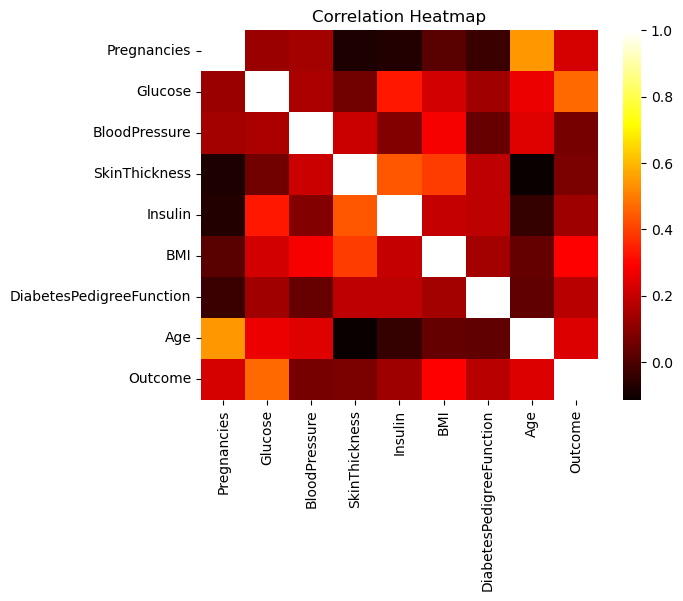

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.heatmap(df.corr(), cmap="hot")
plt.title("Correlation Heatmap")
plt.show()

#### **Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.**


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- No Categorical Data


- Checking for duplicate values


In [5]:
df.duplicated().sum()

0

- Checking for null values


In [6]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

- Checking for outliers


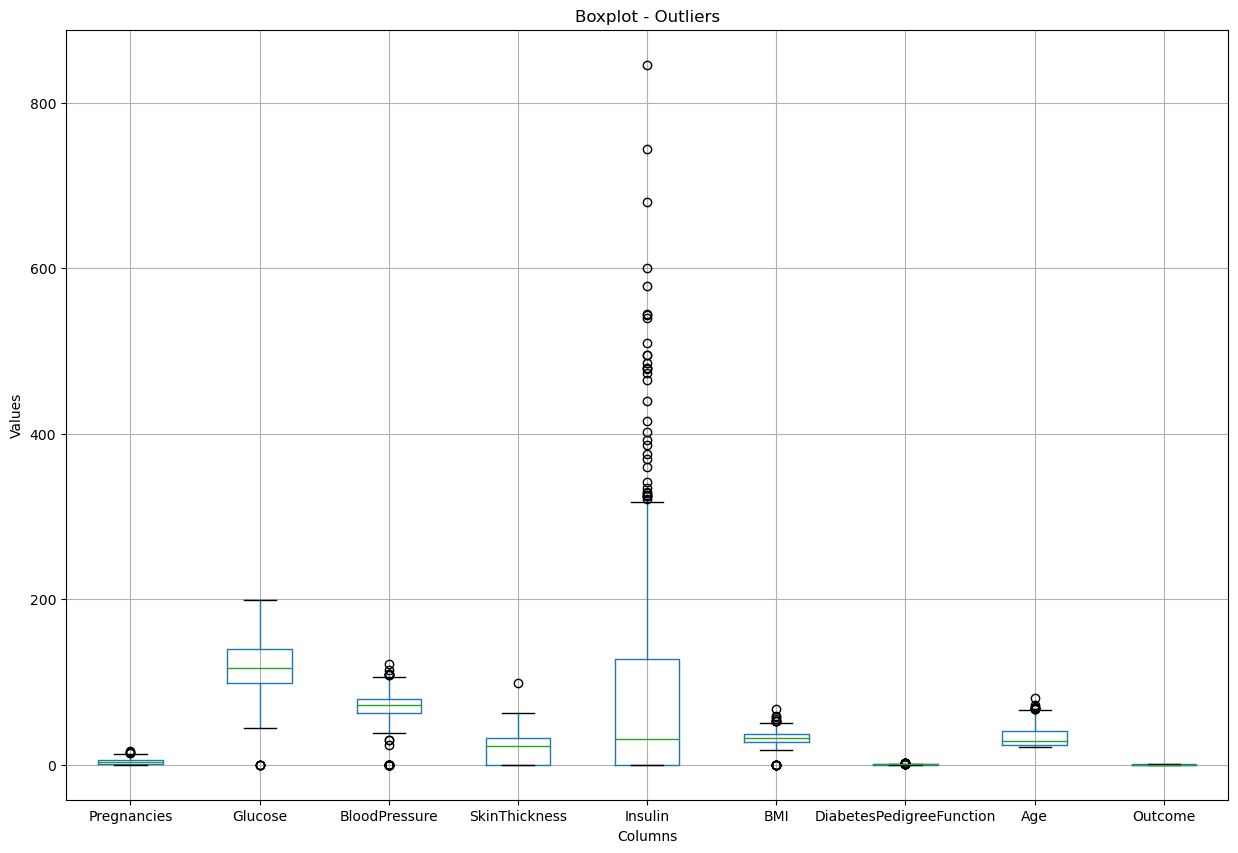

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
df.boxplot()

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot - Outliers')
plt.show()

- Removing Outliers


In [8]:
from scipy import stats


def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = stats.zscore(df[columns])
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return df[filtered_entries]


df_filtered = remove_outliers_zscore(df, df.columns)

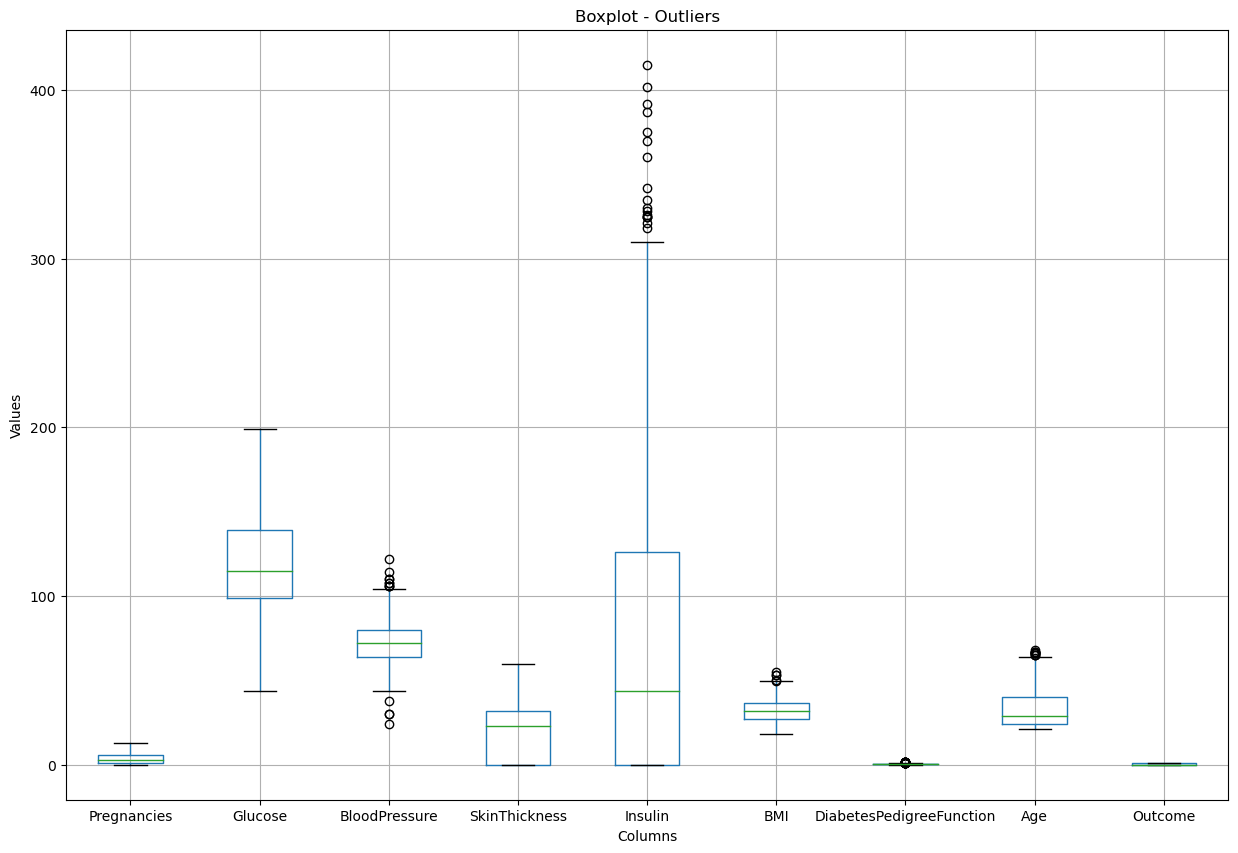

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
df_filtered.boxplot()

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot - Outliers')
plt.show()

- Outliers removed


#### **Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.**


In [10]:
X = df_filtered.drop('Outcome', axis=1)
y = df_filtered['Outcome']

In [11]:
from sklearn.model_selection import train_test_split

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_seed)

#### **Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.**


- Using CART - Decision Tree Algorithm


In [12]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0])

In [14]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
score

-0.40026203734032095

- Hyperparameter


In [15]:
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [16]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
classifiercv = GridSearchCV(
    classifier, param_grid=parameter, cv=5, scoring='accuracy')

In [17]:
classifiercv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [18]:
classifiercv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [19]:
classifiercv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [20]:
y_pred = classifiercv.predict(X_test)

In [21]:
r2_score(y_pred, y_test)

-0.5955375253549697

#### **Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.**


In [22]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Accuracy = 0.6973684210526315
Precision = 0.6379310344827587
Recall = 0.43529411764705883
F1 Score = 0.5174825174825175


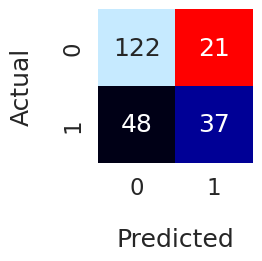

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(2, 2))
sns.set(font_scale=1.5)

conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cbar=False,
    cmap='flag',
    vmax=175
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

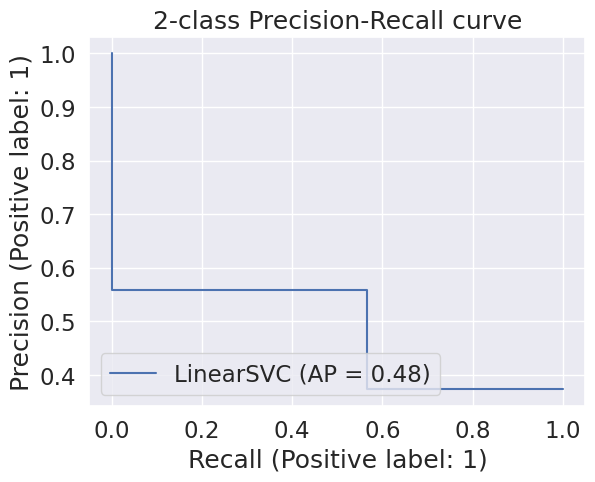

In [24]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

#### **Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.**


[Text(0.39395161290322583, 0.9666666666666667, 'x[1] <= 114.5\ngini = 0.427\nsamples = 460\nvalue = [318, 142]'),
 Text(0.20241935483870968, 0.9, 'x[6] <= 0.661\ngini = 0.221\nsamples = 229\nvalue = [200, 29]'),
 Text(0.10806451612903226, 0.8333333333333334, 'x[7] <= 35.5\ngini = 0.145\nsamples = 190\nvalue = [175, 15]'),
 Text(0.06129032258064516, 0.7666666666666667, 'x[3] <= 23.5\ngini = 0.08\nsamples = 144\nvalue = [138, 6]'),
 Text(0.04838709677419355, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.07419354838709677, 0.7, 'x[0] <= 6.5\ngini = 0.161\nsamples = 68\nvalue = [62, 6]'),
 Text(0.06129032258064516, 0.6333333333333333, 'x[2] <= 51.0\ngini = 0.138\nsamples = 67\nvalue = [62, 5]'),
 Text(0.025806451612903226, 0.5666666666666667, 'x[4] <= 85.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.012903225806451613, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.03870967741935484, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0967741935483871,

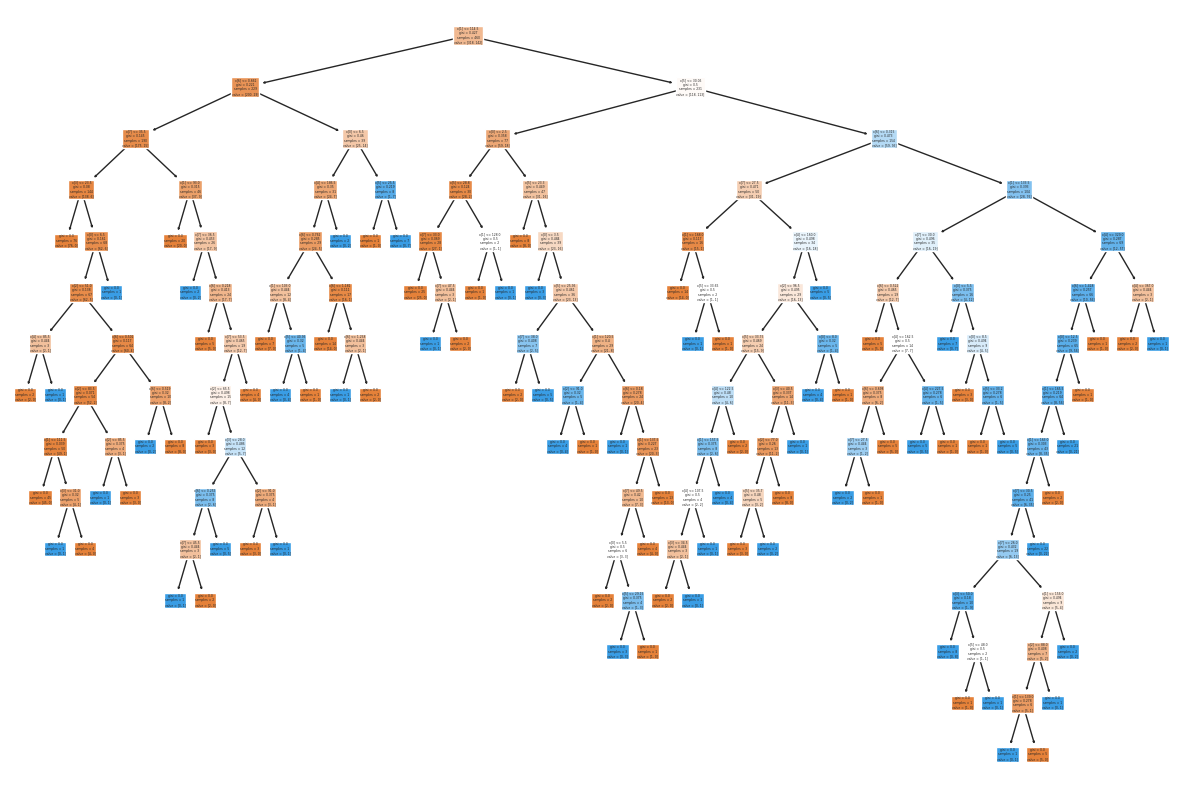

In [25]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(classifier, filled=True)

#### **Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.**


- Sensitivity analysis and scenario testing
    - Sensitivity analysis and scenario testing are more sophisticated methods of validating a model.
    - Sensitivity analysis involves identifying the inputs that have the greatest impact on the model's predictions.
    - Scenario testing involves creating different scenarios and seeing how the model's predictions change in each scenario.

In [59]:
test_data = pd.DataFrame(data=[[6, 148, 72, 35, 0, 33.6, 0.627, 50],
                               [3, 126, 88, 41, 235, 39.3, 0.704, 27],
                               [6, 148, 72, 35, 0, 26.6, 0.627, 50]])

test_predicted = classifier.predict(test_data)
test_predicted

array([1, 0, 0])

- Adding some outliers to the above testing data.


In [60]:
test_data = pd.DataFrame(data=[[6, 148, 72, 35, 0, 33333.6, 0.627, 50],
                               [200, 148, 72, 35, 0, 33.6, 0.627, 50],
                               [6, 148, 7999992, 35, 0, 26.6, 0.627, 50]])

test_predicted = classifier.predict(test_data)
test_predicted

array([1, 0, 0])

- Conclusion : We can see, even after adding some outliers to some features, the prediction doesn't changes. So our model is robust to outliers.